<a href="https://colab.research.google.com/github/tsubasa-km/splatoon3_result/blob/main/splatoon3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
SCREENSHOT_PATH = "/content/Screenshot_20241128_225658_Nintendo Switch Online.jpg"

### 円(武器アイコン)検出

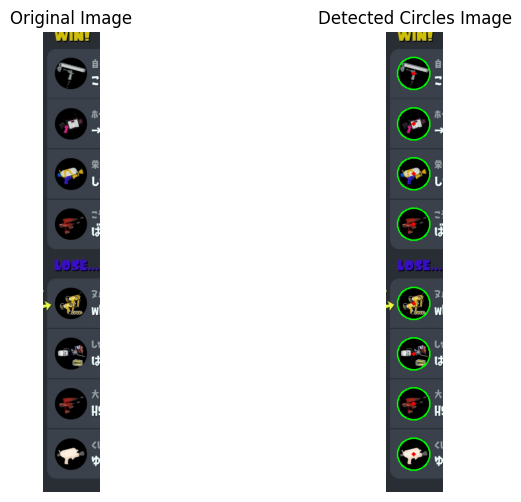

In [4]:
import cv2
import json
import numpy as np
import matplotlib.pyplot as plt

# 画像の読み込み
image = cv2.imread(SCREENSHOT_PATH)
image = image[300:-350,10:120]
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Matplotlibで表示するためにRGBの並びに変更する
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# ノイズ除去のためにぼかしを適用
blurred = cv2.GaussianBlur(gray_image, (9, 9), 2)

# 円の検出
circles = cv2.HoughCircles(
    blurred,
    cv2.HOUGH_GRADIENT,
    dp=1.2,
    minDist=30
)

if circles is None:
    raise ValueError("円が検出されませんでした。")

# 検出された円の描画
circles = np.round(circles[0, :]).astype("int")
for (x, y, r) in circles:
    cv2.circle(image, (x, y), r, (0, 255, 0), 2)
    cv2.circle(image, (x, y), 2, (0, 0, 255), 3)
# 円を保存
with open("/content/weapon_pos.json", "w") as f:
    json.dump(
        {"weapons":[{"x":int(c[0]), "y":int(c[1]), "r":int(c[2])} for c in circles]},
        f,indent=4)


# Matplotlibで表示するためにRGBの並びに変更する
rgb_detected_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 結果を表示
plt.rcParams["figure.figsize"] = [7,5]                                  # ウィンドウサイズを設定
title = "cv2.HoughCircles: codevace.com"
plt.figure(title)                                                       # ウィンドウタイトルを設定
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.03, top=0.95)       # 余白を設定

plt.subplot(121)                                                        # 1行2列の1番目の領域にプロットを設定
plt.imshow(rgb_image)                                                   # 入力画像を表示
plt.title("Original Image")                                             # 画像タイトル設定
plt.axis("off")                                                         # 軸目盛、軸ラベルを消す

plt.subplot(122)                                                        # 1行2列の2番目の領域にプロットを設定
plt.imshow(rgb_detected_image)                                          # ノイズ除去の結果
plt.title("Detected Circles Image")                                     # 画像タイトル設定
plt.axis("off")                                                         # 軸目盛、軸ラベルを消す

plt.show()

### KD検出

インストール

In [5]:
!apt install tesseract-ocr libtesseract-dev tesseract-ocr-jpn
!pip install pyocr
!tesseract -list-langs

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libtesseract-dev is already the newest version (4.1.1-2.1build1).
tesseract-ocr is already the newest version (4.1.1-2.1build1).
tesseract-ocr-jpn is already the newest version (1:4.00~git30-7274cfa-1.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Usage:
  tesseract --help | --help-extra | --version
  tesseract --list-langs
  tesseract imagename outputbase [options...] [configfile...]

OCR options:
  -l LANG[+LANG]        Specify language(s) used for OCR.
NOTE: These options must occur before any configfile.

Single options:
  --help                Show this help message.
  --help-extra          Show extra help for advanced users.
  --version             Show version information.
  --list-langs          List available languages for tesseract engine.


前処理

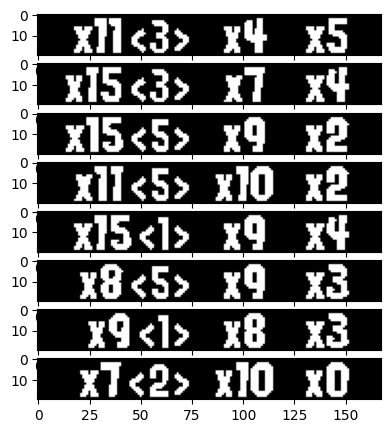

In [11]:
import numpy as np
img = cv2.imread(SCREENSHOT_PATH,0)

img = img[300:-350,-193:-25]
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

_,img = cv2.threshold(img, 80, 255, cv2.THRESH_BINARY)


result = [
    img[83:103,:],
    img[181:201,:],
    img[278:298,:],
    img[376:396,:],
    img[530:550,:],
    img[627:647,:],
    img[725:745,:],
    img[822:842,:],
]

for i,r in enumerate(result):
    plt.subplot(8,1,1+i)
    plt.imshow(r)

文字検出

In [28]:
!sudo mv "/content/spl.traineddata" "/usr/share/tesseract-ocr/4.00/tessdata"

In [30]:
import pyocr
from PIL import Image


# OCRエンジンを取得
engines = pyocr.get_available_tools()
engine = engines[0]

# 対応言語取得
langs = engine.get_available_languages()
print("対応言語:",langs) # ['eng', 'jpn', 'osd', 'spl']
for r in result:
    txt = engine.image_to_string(Image.fromarray(r), lang="spl")
    print(txt)

対応言語: ['eng', 'jpn', 'osd', 'spl']
x11<3> x4 x5
x15<3> x7 x4
x15<5> x9 x2
x11<5> x10 x2
x15 <1> x9 x4
x8<5> x9 x3
x9 <1> x8 x3
x7<2> x10 x0
